In [205]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

In [206]:
from google.colab import drive


drive.mount("/content/gdrive", force_remount=True)
churn_df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/train_churn.csv")


Mounted at /content/gdrive


# Data exploration and visualisation

In [207]:
# show the five first rows
churn_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
0,NSW,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
1,TAS,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,SA,73,415,No,No,0,224.4,90,38.15,159.5,88,13.56,192.8,74,8.68,13.0,2,3.51,1,0
3,VIC,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,QLD,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0


In [208]:
# show data type of each column
churn_df.dtypes


X1      object
X2       int64
X3       int64
X4      object
X5      object
X6       int64
X7     float64
X8       int64
X9     float64
X10    float64
X11      int64
X12    float64
X13    float64
X14      int64
X15    float64
X16    float64
X17      int64
X18    float64
X19      int64
X20      int64
dtype: object

In [209]:
# check missing value
churn_df.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
dtype: int64

In [210]:
# Remove customer states code from the data set
churn_df = churn_df.iloc[:,1:]

# Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(churn_df)
df_dummies.head()

,X2,X3,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X4_No,X4_Yes,X5_No,X5_Yes
0,65,415,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1,1,0,1,0
1,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,1,0,1,0
2,73,415,0,224.4,90,38.15,159.5,88,13.56,192.8,74,8.68,13.0,2,3.51,1,0,1,0,1,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,1,1,0
4,118,510,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0,0,1,1,0


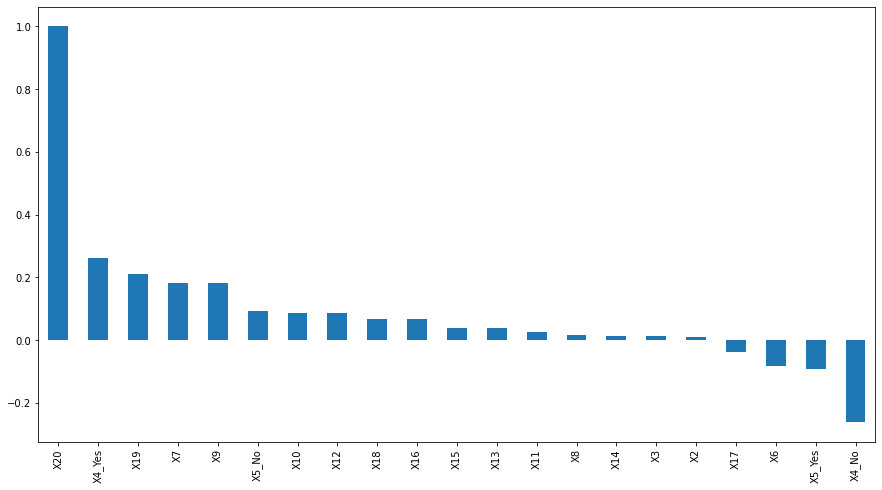

In [211]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['X20'].sort_values(ascending = False).plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'number of times customer service was called')

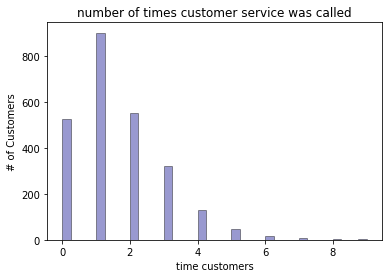

In [212]:
# seaborn library for data visualisation 
# X19 = number of times customer service was called 
ax = sns.distplot(churn_df['X19'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('time customers')
ax.set_title('number of times customer service was called')

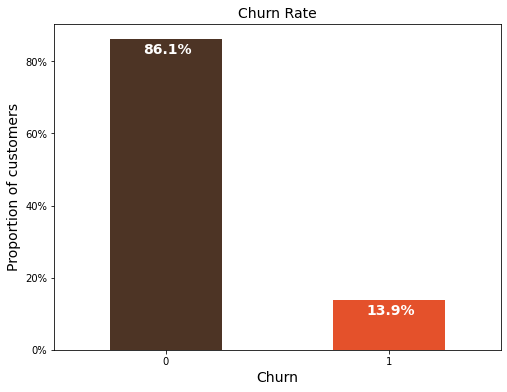

In [213]:
colors = ['#4D3425','#E4512B']
ax = (churn_df['X20'].value_counts()*100.0 /len(churn_df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Proportion of customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)
  # as we can see mostly of the customers didn't churn

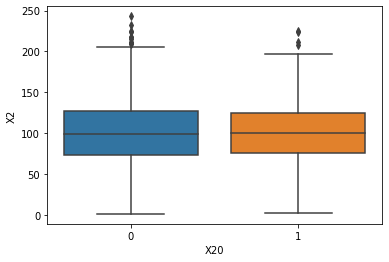

In [214]:
sns.boxplot(x = churn_df.X20, y = churn_df.X2)


# preprocessing & select features

In [215]:
# We will use the data frame where we had created dummy variables
y = df_dummies['X20'].values
X = df_dummies.drop(columns = ['X20'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features






# split and train data


In [216]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# create model

In [217]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [218]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
results = pd.DataFrame([['Logistic Regression', 
acc, prec]], columns = ['Model', 
'Accuracy', 'Precision'])
print (results)

                 Model  Accuracy  Precision
0  Logistic Regression  0.869333   0.655172


# make churn prediction

In [219]:
drive.mount("/content/gdrive", force_remount=True)
churn_predict = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/predict_churn.csv")


Mounted at /content/gdrive


In [220]:
# Remove customer states code from the data set
churn_predict = churn_predict.iloc[:,1:]

# Let's convert all the categorical variables into dummy variables
predict_dummies = pd.get_dummies(churn_predict)
predict_dummies.head()

,X2,X3,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X4_No,X4_Yes,X5_No,X5_Yes
0,121,415,41,215.5,95,36.64,241.8,92,20.55,147.0,108,6.61,9.6,3,2.59,1,1,0,0,1
1,101,415,0,124.8,66,21.22,257.2,85,21.86,193.2,115,8.69,13.4,4,3.62,0,1,0,1,0
2,115,408,0,178.7,114,30.38,271.0,96,23.04,245.9,94,11.07,16.4,5,4.43,2,1,0,1,0
3,168,415,0,183.2,131,31.14,179.2,73,15.23,292.8,100,13.18,9.9,5,2.67,2,1,0,1,0
4,90,415,0,167.5,96,28.48,139.1,104,11.82,138.4,87,6.23,13.0,1,3.51,1,1,0,1,0


In [221]:
# given a trained model, predict the label of a new set of data
model.predict(predict_dummies)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [223]:
predict_dummies = model.predict(X)
# to csv
prediction = pd.DataFrame(predict_dummies).to_csv('7843_predict.csv')

from google.colab import files
# download file
files.download('7843_predict.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>